## Classification on data set March_2024_AF2_01.txt. The target attribute is structure name.


In [2]:
import pandas as pd

In [3]:

df = pd.read_csv("../March_2024_AF2_01.txt", sep=r"\s+", header=None)
df.columns = ['Protein_number', 'res_number', 'PB1', 'PB2', 'AA1', 'AA2', 'S2_1', 'S2_2', 'expected_frequency', 'plDDT', 'RSA1', 'RSA2']
df

,Protein_number,res_number,PB1,PB2,AA1,AA2,S2_1,S2_2,expected_frequency,plDDT,RSA1,RSA2
0,0,7,j,j,G,G,C,S,0.880055,60.180000,100.000000,100.000000
1,1,95,n,l,E,Q,T,T,0.736402,96.220001,89.762611,98.582039
2,1,219,i,d,G,N,S,C,0.040571,31.870001,100.000000,100.000000
3,1,222,d,i,T,V,C,C,0.021758,47.259998,100.000000,100.000000
4,1,223,i,d,V,P,C,C,0.040571,38.200001,100.000000,93.366096
...,...,...,...,...,...,...,...,...,...,...,...,...
671150,23508,14909273,j,d,G,L,C,C,0.623739,95.459999,1.531394,20.793951
671151,23508,14909291,f,d,C,D,P,S,0.047665,95.379997,11.473963,100.000000
671152,23508,14909390,j,d,G,P,S,P,0.623739,80.699997,65.849922,88.452087
671153,23508,14909434,g,f,L,T,C,C,0.430306,79.760002,60.491493,46.452702


In [4]:
def concat_structures(data, rm_columns : list, req_col_str : str):
    """
    Input:
        - data: DataFrame to be processed (a copy is used to avoid modifying the original).
        - rm_columns: List of column names (strings) to be removed.
        - req_col_str: String of a new column name with "-" indicating concatenation.
    Output:
        - A modified copy of the DataFrame with the requested changes.
    """
    data = data.copy()
    data = data.drop(list(('Protein_number', 'res_number')), axis=1)
    data[req_col_str] = ""
    for req_col in req_col_str.split('-'):
        data[req_col_str] += data[req_col]
    data = data.drop(rm_columns, axis=1)
    return data

In [5]:
df1 = concat_structures(df, list(('AA1', 'AA2')), 'AA1-AA2')
df1

,PB1,PB2,S2_1,S2_2,expected_frequency,plDDT,RSA1,RSA2,AA1-AA2
0,j,j,C,S,0.880055,60.180000,100.000000,100.000000,GG
1,n,l,T,T,0.736402,96.220001,89.762611,98.582039,EQ
2,i,d,S,C,0.040571,31.870001,100.000000,100.000000,GN
3,d,i,C,C,0.021758,47.259998,100.000000,100.000000,TV
4,i,d,C,C,0.040571,38.200001,100.000000,93.366096,VP
...,...,...,...,...,...,...,...,...,...
671150,j,d,C,C,0.623739,95.459999,1.531394,20.793951,GL
671151,f,d,P,S,0.047665,95.379997,11.473963,100.000000,CD
671152,j,d,S,P,0.623739,80.699997,65.849922,88.452087,GP
671153,g,f,C,C,0.430306,79.760002,60.491493,46.452702,LT


In [6]:
df2 = concat_structures(df, list(('PB1', 'PB2')), 'PB1-PB2')
df2

,AA1,AA2,S2_1,S2_2,expected_frequency,plDDT,RSA1,RSA2,PB1-PB2
0,G,G,C,S,0.880055,60.180000,100.000000,100.000000,jj
1,E,Q,T,T,0.736402,96.220001,89.762611,98.582039,nl
2,G,N,S,C,0.040571,31.870001,100.000000,100.000000,id
3,T,V,C,C,0.021758,47.259998,100.000000,100.000000,di
4,V,P,C,C,0.040571,38.200001,100.000000,93.366096,id
...,...,...,...,...,...,...,...,...,...
671150,G,L,C,C,0.623739,95.459999,1.531394,20.793951,jd
671151,C,D,P,S,0.047665,95.379997,11.473963,100.000000,fd
671152,G,P,S,P,0.623739,80.699997,65.849922,88.452087,jd
671153,L,T,C,C,0.430306,79.760002,60.491493,46.452702,gf


In [7]:
df3 = concat_structures(df, list(('S2_1', 'S2_2')), 'S2_1-S2_2')
df3

,PB1,PB2,AA1,AA2,expected_frequency,plDDT,RSA1,RSA2,S2_1-S2_2
0,j,j,G,G,0.880055,60.180000,100.000000,100.000000,CS
1,n,l,E,Q,0.736402,96.220001,89.762611,98.582039,TT
2,i,d,G,N,0.040571,31.870001,100.000000,100.000000,SC
3,d,i,T,V,0.021758,47.259998,100.000000,100.000000,CC
4,i,d,V,P,0.040571,38.200001,100.000000,93.366096,CC
...,...,...,...,...,...,...,...,...,...
671150,j,d,G,L,0.623739,95.459999,1.531394,20.793951,CC
671151,f,d,C,D,0.047665,95.379997,11.473963,100.000000,PS
671152,j,d,G,P,0.623739,80.699997,65.849922,88.452087,SP
671153,g,f,L,T,0.430306,79.760002,60.491493,46.452702,CC


In [8]:
import matplotlib.pyplot as plt

def check_imbalance(target_attr):

    if target_attr.dtype != 'category':
        target_attr = target_attr.astype('category')

    category_counts = target_attr.value_counts().head(len(target_attr.unique()))

    plt.figure(figsize=(8, 6))
    plt.bar(category_counts.index, category_counts.values)
    plt.xlabel(target_attr.name)
    plt.ylabel('Frequency')
    plt.title(f"Class Imbalance; The number of labels in the target attribute: {len(target_attr.unique())}")

    plt.xticks([])
    plt.tight_layout()
    plt.show()

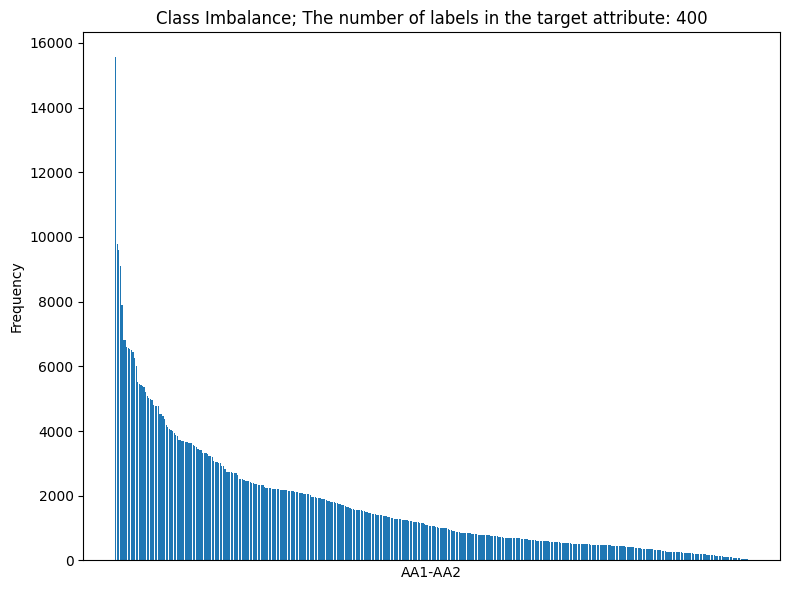

In [9]:
check_imbalance(df1['AA1-AA2'])

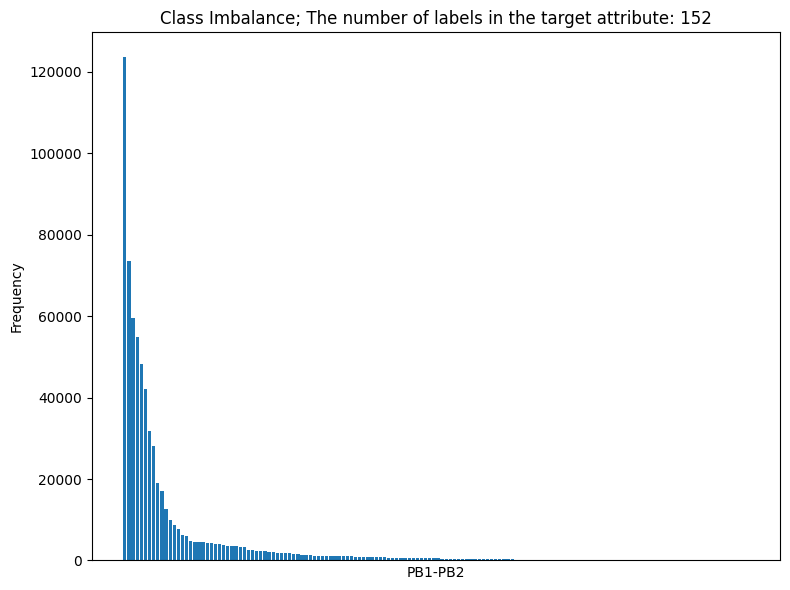

In [10]:
check_imbalance(df2['PB1-PB2'])

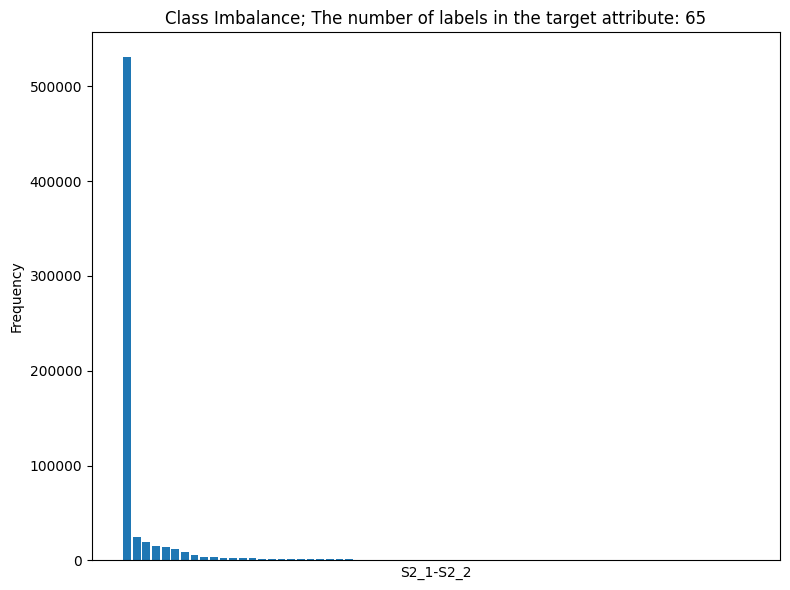

In [11]:
check_imbalance(df3['S2_1-S2_2'])

##### We notice that in all three cases, one class is much more frequent than the others. Therefore, for some classifiers, it will be necessary to handle class imbalance. Since there are a large number of classes and one is more dominant, the best approach might be to apply techniques like under-sampling, over-sampling, or adjusting class weights to balance the classes.

# CatBoost

In [12]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [13]:
def train_test(data):
  target = data.columns[-1]
  features = data.columns[:-1]
  X = data[features]
  y = data[target]

  class_counts = y.value_counts()
  valid_classes = class_counts[class_counts >= 2].index
  X = X[y.isin(valid_classes)]
  y = y[y.isin(valid_classes)]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
  return X_train, X_test, y_train, y_test

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def classification_report(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
  recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
  f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

  metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
  }

  metrics_df = pd.DataFrame(metrics)
  print(metrics_df.to_markdown(index=False))

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def conf_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    return cm

In [22]:
def CBClassifier(data, iters, learning_rate, cat_features, verbose, name):
  model = CatBoostClassifier(iterations=iters, learning_rate=learning_rate, depth=8, task_type="GPU", cat_features=cat_features, auto_class_weights='Balanced', verbose=verbose)

  X_train, X_test, y_train, y_test = train_test(data)
  print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  classification_report(y_test, y_pred)

  print("To check for potential overfitting, we will evaluate the model on training data as well.")
  y_pred = model.predict(X_train)
  classification_report(y_train, y_pred)
    
  cm = conf_matrix(y_train, y_pred)
  classes = np.unique(np.concatenate([y_train, y_test]))
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  df_cm.to_csv(name+"_conf_matrix.csv", index=True)

  model.save_model(name + "_catboost_model.cbm")


### Predicting amino acids

(402693, 8) (268462, 8) (402693,) (268462,)
0:	learn: 5.9796958	total: 28.6s	remaining: 23m 23s
10:	learn: 5.8780729	total: 5m 21s	remaining: 18m 58s
20:	learn: 5.8005099	total: 10m 14s	remaining: 14m 8s
30:	learn: 5.7384325	total: 15m 7s	remaining: 9m 16s
40:	learn: 5.6876961	total: 20m	remaining: 4m 23s
49:	learn: 5.6470481	total: 24m 23s	remaining: 0us
| Metric    |     Score |
|:----------|----------:|
| Accuracy  | 0.0226959 |
| Precision | 0.628512  |
| Recall    | 0.0226959 |
| F1 Score  | 0.0103099 |
To check for potential overfitting, we will evaluate the model on training data as well.
| Metric    |     Score |
|:----------|----------:|
| Accuracy  | 0.0254636 |
| Precision | 0.629237  |
| Recall    | 0.0254636 |
| F1 Score  | 0.0122209 |


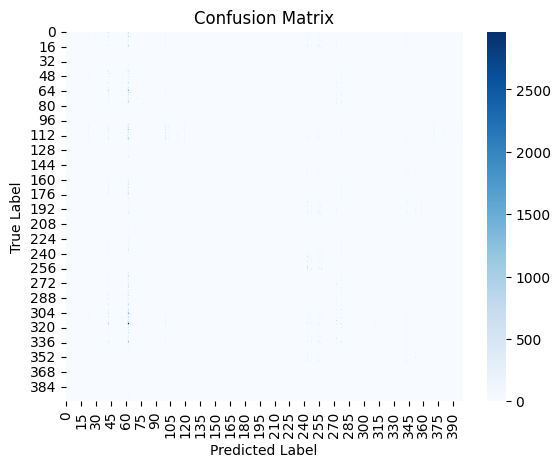

In [ ]:
CBClassifier(df1, 50, 0.01, ['PB1', 'PB2', 'S2_1', 'S2_2'], 10, "aminoacid")

### Predicting protein blocks

(402692, 8) (268462, 8) (402692,) (268462,)
0:	learn: 4.9043485	total: 3.75s	remaining: 6m 11s
20:	learn: 3.9018002	total: 1m 14s	remaining: 4m 39s
40:	learn: 3.3092291	total: 2m 25s	remaining: 3m 28s
60:	learn: 2.9063798	total: 3m 36s	remaining: 2m 18s
80:	learn: 2.5692726	total: 4m 47s	remaining: 1m 7s
99:	learn: 2.3389713	total: 5m 54s	remaining: 0us
| Metric    |    Score |
|:----------|---------:|
| Accuracy  | 0.941776 |
| Precision | 0.960555 |
| Recall    | 0.941776 |
| F1 Score  | 0.947223 |
To check for potential overfitting, we will evaluate the model on training data as well.
| Metric    |    Score |
|:----------|---------:|
| Accuracy  | 0.942656 |
| Precision | 0.961268 |
| Recall    | 0.942656 |
| F1 Score  | 0.948085 |


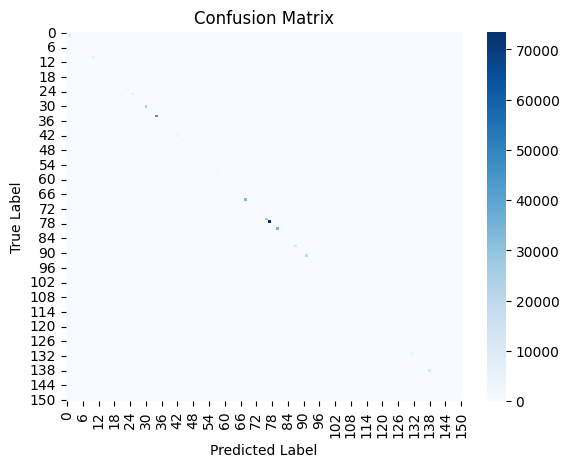

In [ ]:
CBClassifier(df2, 100, 0.01, ['AA1', 'AA2', 'S2_1', 'S2_2'], 20, "pbs")

### Predicting secundary structures

In [20]:
CBClassifier(df3, 150, 0.01, ['PB1', 'PB2', 'AA1', 'AA2'], 30, "secstruc")

(402693, 8) (268462, 8) (402693,) (268462,)
0:	learn: 4.1543361	total: 1m 55s	remaining: 4h 47m 9s


KeyboardInterrupt: 

# Artificial Neural Network

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
def preprocessing(df, target_name, categorical_col, numerical_col):
    # Split features & target
    y = df[target_name]
    X = df.drop(columns=[target_name])

    # Encode target
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Preprocessing
    preprocessor = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ("num", StandardScaler(), numerical_cols)
    ])

    X_prepared = preprocessor.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_prepared, y_encoded, test_size=0.2, random_state=42
    )
    print(X_train.shape)
    print(X_test.shape)

    classes = np.unique(y_train)
    class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
    class_weight_dict = dict(zip(classes, class_weights))

    input_dim = X_train.shape[1]
    num_classes = len(np.unique(y_encoded))

    y_train_cat = to_categorical(y_train, num_classes)
    y_test_cat = to_categorical(y_test, num_classes)

    return X_train, X_test, y_train_cat, y_test_cat, input_dim, num_classes, class_weight_dict

In [ ]:
# Function to build model with hyperparameters
def build_model(hidden_units1=128, hidden_units2=64, dropout_rate=0.3, learning_rate=0.001):
    from tensorflow.keras.optimizers import Adam
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(hidden_units1, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(hidden_units2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def manual_grid_search():
    # Callbacks
    checkpoint = ModelCheckpoint(
        'best_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Hyperparameter options
    param_grid = {
        'hidden_units1': [64, 128],
        'hidden_units2': [32, 64],
        'dropout_rate': [0.3, 0.5],
        'learning_rate': [0.001, 0.005]
    }

    best_val_acc = 0
    best_params = None
    best_history = None
    best_model = None

    # Manual grid search
    for h1 in param_grid['hidden_units1']:
        for h2 in param_grid['hidden_units2']:
            for dr in param_grid['dropout_rate']:
                for lr in param_grid['learning_rate']:
                    print(f"\nTesting config: h1={h1}, h2={h2}, dropout={dr}, lr={lr}")
                    model = build_model(h1, h2, dr, lr)
                    history = model.fit(
                        X_train, y_train_cat,
                        class_weight=class_weight_dict,
                        validation_data=(X_test, y_test_cat),
                        epochs=20,
                        batch_size=512,
                        callbacks=[checkpoint, early_stop],
                        verbose=0
                    )
                    val_acc = max(history.history['val_accuracy'])
                    print(f"Validation accuracy: {val_acc:.4f}")
                    if val_acc > best_val_acc:
                        best_val_acc = val_acc
                        best_params = (h1, h2, dr, lr)
                        best_history = history
                        best_model = model

    print(f"\nBest hyperparameters: h1={best_params[0]}, h2={best_params[1]}, "
          f"dropout={best_params[2]}, lr={best_params[3]}")
    print(f"Best validation accuracy: {best_val_acc:.4f}")

    return best_history, best_model

In [ ]:
def plot_learning_curves(best_history):

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(best_history.history['accuracy'], label='Train Acc')
    plt.plot(best_history.history['val_accuracy'], label='Val Acc')
    plt.title("Accuracy over epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(best_history.history['loss'], label='Train Loss')
    plt.plot(best_history.history['val_loss'], label='Val Loss')
    plt.title("Loss over epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

### Predicting amino acids

In [ ]:
# Categorical & numerical columns
categorical_cols = ['PB1', 'PB2', 'S2_1', 'S2_2']
numerical_cols = ['expected_frequency', 'plDDT', 'RSA1', 'RSA2']
target_name = 'AA1-AA2'

X_train, X_test, y_train_cat, y_test_cat, input_dim, num_classes, class_weight_dict = preprocessing(df1, target_name, categorical_cols, numerical_cols)
best_history, best_model = manual_grid_search()
best_model.save("aminoacid_final_best_model.keras")

(536924, 54)
(134231, 54)

Testing config: h1=64, h2=32, dropout=0.3, lr=0.001


2025-08-02 00:35:58.864506: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 859078400 exceeds 10% of free system memory.



Epoch 1: val_accuracy improved from -inf to 0.02263, saving model to best_model.keras

Epoch 2: val_accuracy improved from 0.02263 to 0.02730, saving model to best_model.keras

Epoch 3: val_accuracy improved from 0.02730 to 0.02891, saving model to best_model.keras

Epoch 4: val_accuracy did not improve from 0.02891

Epoch 5: val_accuracy did not improve from 0.02891

Epoch 6: val_accuracy did not improve from 0.02891

Epoch 7: val_accuracy did not improve from 0.02891

Epoch 8: val_accuracy did not improve from 0.02891

Epoch 9: val_accuracy did not improve from 0.02891

Epoch 10: val_accuracy did not improve from 0.02891

Epoch 11: val_accuracy did not improve from 0.02891

Epoch 12: val_accuracy did not improve from 0.02891

Epoch 13: val_accuracy did not improve from 0.02891

Epoch 14: val_accuracy improved from 0.02891 to 0.02892, saving model to best_model.keras

Epoch 15: val_accuracy did not improve from 0.02892

Epoch 16: val_accuracy did not improve from 0.02892

Epoch 17: v

2025-08-02 00:40:39.397614: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 859078400 exceeds 10% of free system memory.



Epoch 1: val_accuracy did not improve from 0.02892

Epoch 2: val_accuracy did not improve from 0.02892

Epoch 3: val_accuracy did not improve from 0.02892

Epoch 4: val_accuracy did not improve from 0.02892

Epoch 5: val_accuracy did not improve from 0.02892

Epoch 6: val_accuracy did not improve from 0.02892

Epoch 7: val_accuracy did not improve from 0.02892

Epoch 8: val_accuracy did not improve from 0.02892

Epoch 9: val_accuracy did not improve from 0.02892

Epoch 10: val_accuracy did not improve from 0.02892

Epoch 11: val_accuracy did not improve from 0.02892

Epoch 12: val_accuracy did not improve from 0.02892

Epoch 13: val_accuracy did not improve from 0.02892

Epoch 14: val_accuracy did not improve from 0.02892

Epoch 15: val_accuracy did not improve from 0.02892

Epoch 16: val_accuracy did not improve from 0.02892

Epoch 17: val_accuracy did not improve from 0.02892

Epoch 18: val_accuracy did not improve from 0.02892

Epoch 19: val_accuracy did not improve from 0.02892

E

2025-08-02 00:42:53.714211: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 859078400 exceeds 10% of free system memory.



Epoch 1: val_accuracy did not improve from 0.02892

Epoch 2: val_accuracy did not improve from 0.02892

Epoch 3: val_accuracy did not improve from 0.02892

Epoch 4: val_accuracy did not improve from 0.02892

Epoch 5: val_accuracy did not improve from 0.02892

Epoch 6: val_accuracy did not improve from 0.02892

Epoch 7: val_accuracy did not improve from 0.02892

Epoch 8: val_accuracy did not improve from 0.02892

Epoch 9: val_accuracy did not improve from 0.02892

Epoch 10: val_accuracy did not improve from 0.02892

Epoch 11: val_accuracy did not improve from 0.02892

Epoch 12: val_accuracy did not improve from 0.02892

Epoch 13: val_accuracy did not improve from 0.02892

Epoch 14: val_accuracy did not improve from 0.02892

Epoch 15: val_accuracy did not improve from 0.02892

Epoch 16: val_accuracy did not improve from 0.02892

Epoch 17: val_accuracy did not improve from 0.02892

Epoch 18: val_accuracy did not improve from 0.02892

Epoch 19: val_accuracy did not improve from 0.02892

E

2025-08-02 00:45:14.869546: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 859078400 exceeds 10% of free system memory.



Epoch 1: val_accuracy did not improve from 0.02892

Epoch 2: val_accuracy did not improve from 0.02892

Epoch 3: val_accuracy did not improve from 0.02892

Epoch 4: val_accuracy did not improve from 0.02892

Epoch 5: val_accuracy did not improve from 0.02892

Epoch 6: val_accuracy did not improve from 0.02892

Epoch 7: val_accuracy did not improve from 0.02892

Epoch 8: val_accuracy did not improve from 0.02892

Epoch 9: val_accuracy did not improve from 0.02892

Epoch 10: val_accuracy did not improve from 0.02892

Epoch 11: val_accuracy did not improve from 0.02892

Epoch 12: val_accuracy did not improve from 0.02892

Epoch 13: val_accuracy did not improve from 0.02892

Epoch 14: val_accuracy did not improve from 0.02892

Epoch 15: val_accuracy did not improve from 0.02892
Validation accuracy: 0.0229

Testing config: h1=64, h2=64, dropout=0.3, lr=0.001


2025-08-02 00:47:10.036234: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 859078400 exceeds 10% of free system memory.



Epoch 1: val_accuracy did not improve from 0.02892

Epoch 2: val_accuracy did not improve from 0.02892

Epoch 3: val_accuracy did not improve from 0.02892

Epoch 4: val_accuracy did not improve from 0.02892

Epoch 5: val_accuracy did not improve from 0.02892

Epoch 6: val_accuracy did not improve from 0.02892

Epoch 7: val_accuracy improved from 0.02892 to 0.02921, saving model to best_model.keras

Epoch 8: val_accuracy did not improve from 0.02921

Epoch 9: val_accuracy did not improve from 0.02921

Epoch 10: val_accuracy improved from 0.02921 to 0.03023, saving model to best_model.keras

Epoch 11: val_accuracy did not improve from 0.03023

Epoch 12: val_accuracy did not improve from 0.03023

Epoch 13: val_accuracy did not improve from 0.03023

Epoch 14: val_accuracy did not improve from 0.03023

Epoch 15: val_accuracy did not improve from 0.03023

Epoch 16: val_accuracy did not improve from 0.03023

Epoch 17: val_accuracy did not improve from 0.03023

Epoch 18: val_accuracy did not 

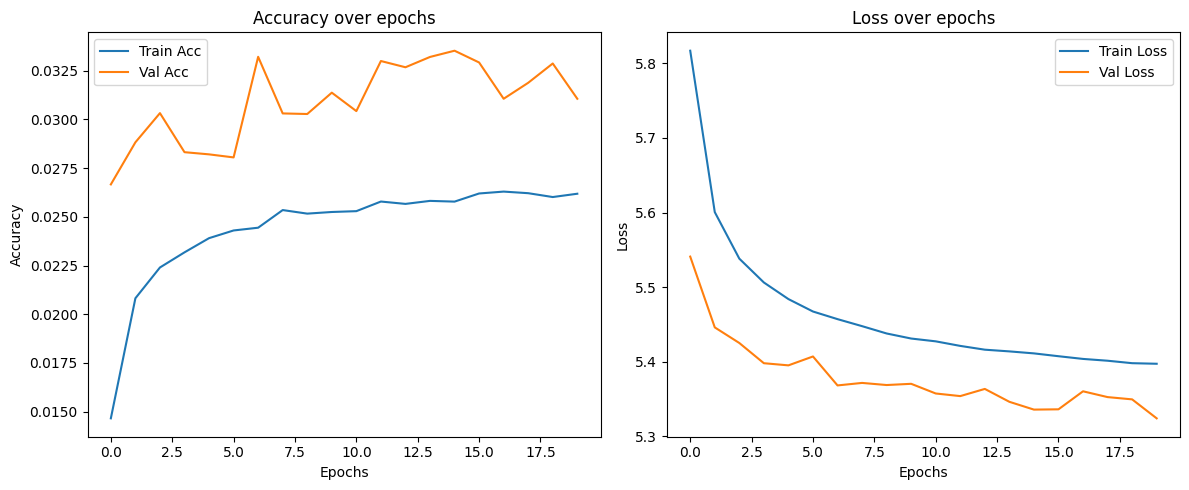

In [ ]:
plot_learning_curves(best_history)

### Predicting protein blocks

In [ ]:
categorical_cols = ['AA1', 'AA2', 'S2_1', 'S2_2']
numerical_cols = ['expected_frequency', 'plDDT', 'RSA1', 'RSA2']
target_name = 'PB1-PB2'

X_train, X_test, y_train_cat, y_test_cat, input_dim, num_classes, class_weight_dict = preprocessing(df2, target_name, categorical_cols, numerical_cols)
best_history, best_model = manual_grid_search()
best_model.save("proteinblock_final_best_model.keras")

(536924, 62)
(134231, 62)

Testing config: h1=64, h2=32, dropout=0.3, lr=0.001

Epoch 1: val_accuracy improved from -inf to 0.47517, saving model to best_model.keras

Epoch 2: val_accuracy did not improve from 0.47517

Epoch 3: val_accuracy improved from 0.47517 to 0.63544, saving model to best_model.keras

Epoch 4: val_accuracy did not improve from 0.63544

Epoch 5: val_accuracy improved from 0.63544 to 0.69374, saving model to best_model.keras

Epoch 6: val_accuracy did not improve from 0.69374

Epoch 7: val_accuracy did not improve from 0.69374

Epoch 8: val_accuracy improved from 0.69374 to 0.71640, saving model to best_model.keras

Epoch 9: val_accuracy did not improve from 0.71640

Epoch 10: val_accuracy did not improve from 0.71640

Epoch 11: val_accuracy did not improve from 0.71640

Epoch 12: val_accuracy did not improve from 0.71640

Epoch 13: val_accuracy improved from 0.71640 to 0.71837, saving model to best_model.keras

Epoch 14: val_accuracy did not improve from 0.71837



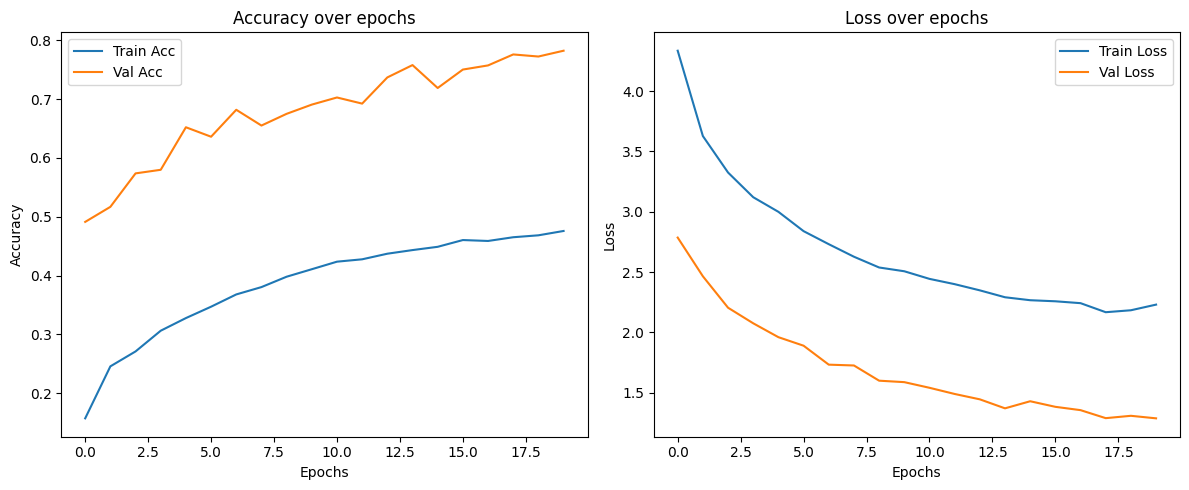

In [ ]:
plot_learning_curves(best_history)

### Predicting secondary structures

In [ ]:
categorical_cols = ['PB1', 'PB2', 'AA1', 'AA2']
numerical_cols = ['expected_frequency', 'plDDT', 'RSA1', 'RSA2']
target_name = 'S2_1-S2_2'

X_train, X_test, y_train_cat, y_test_cat, input_dim, num_classes, class_weight_dict = preprocessing(df3, target_name, categorical_cols, numerical_cols)
best_history, best_model = manual_grid_search()
best_model.save("secstruct_final_best_model.keras")

(536924, 76)
(134231, 76)

Testing config: h1=64, h2=32, dropout=0.3, lr=0.001

Epoch 1: val_accuracy improved from -inf to 0.46643, saving model to best_model.keras

Epoch 2: val_accuracy improved from 0.46643 to 0.51898, saving model to best_model.keras

Epoch 3: val_accuracy did not improve from 0.51898

Epoch 4: val_accuracy did not improve from 0.51898

Epoch 5: val_accuracy did not improve from 0.51898

Epoch 6: val_accuracy did not improve from 0.51898

Epoch 7: val_accuracy did not improve from 0.51898

Epoch 8: val_accuracy did not improve from 0.51898

Epoch 9: val_accuracy did not improve from 0.51898

Epoch 10: val_accuracy did not improve from 0.51898

Epoch 11: val_accuracy did not improve from 0.51898

Epoch 12: val_accuracy did not improve from 0.51898

Epoch 13: val_accuracy did not improve from 0.51898

Epoch 14: val_accuracy did not improve from 0.51898

Epoch 15: val_accuracy did not improve from 0.51898

Epoch 16: val_accuracy did not improve from 0.51898
Validatio

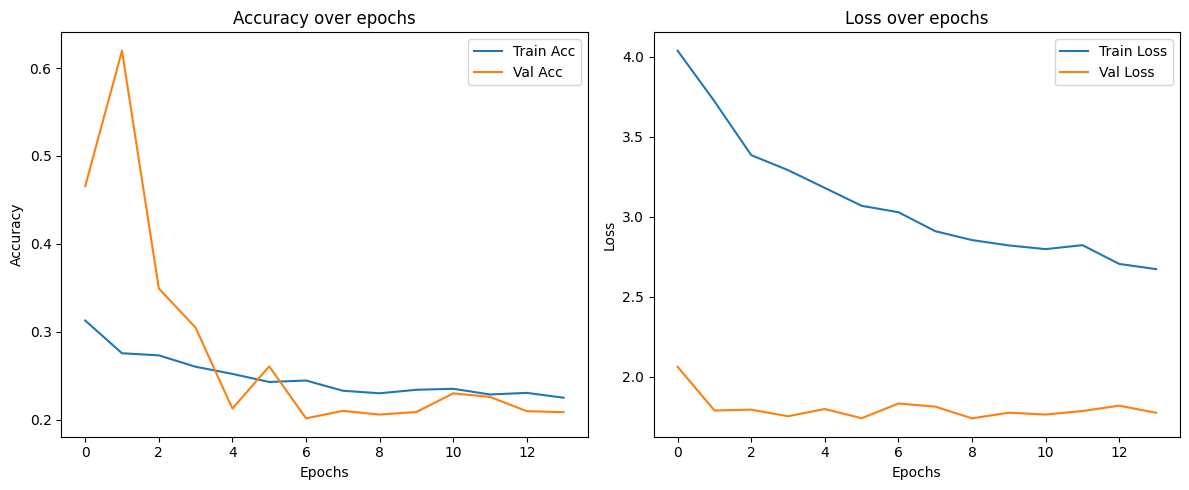

In [ ]:
plot_learning_curves(best_history)